In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Veriyi yükleyelim (Loading the dataset)
data= pd.read_csv("supply_chain_data.csv")

In [9]:
# Veri tipi kontrolü ve eksik değerlerin analizi (Data types and missing values analysis)
data_info = data.info()  # Veri setinin temel bilgilerini gösterir (Shows basic information about the dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [11]:
# Eksik değerlerin kontrolü (Checking for missing values)
missing_values = data.isnull().sum()  # Her sütundaki eksik değerlerin sayısını hesaplar (Counts missing values in each column)

In [13]:
# Sayısal verilerin temel istatistiksel analizini yapalım (Basic statistical analysis of numeric columns)
numeric_stats = data.describe()  # Sayısal sütunlar için temel istatistikleri verir (Gives basic statistics for numeric columns)

In [15]:
# Kategorik sütunların dağılımını inceleyelim (Investigating the distribution of categorical columns)
categorical_columns = data.select_dtypes(include=['object']).columns  # Kategorik sütunları seçer (Selects categorical columns)

C:\Users\aziz-\AppData\Local\Temp\ipykernel_17572\1207767814.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], palette="Set2")  # Her kategorik değişkenin dağılımını sayısal olarak gösteriyoruz (Displaying the distribution of each categorical variable)
C:\Users\aziz-\AppData\Local\Temp\ipykernel_17572\1207767814.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], palette="Set2")  # Her kategorik değişkenin dağılımını sayısal olarak gösteriyoruz (Displaying the distribution of each categorical variable)
C:\Users\aziz-\AppData\Local\Temp\ipykernel_17572\1207767814.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

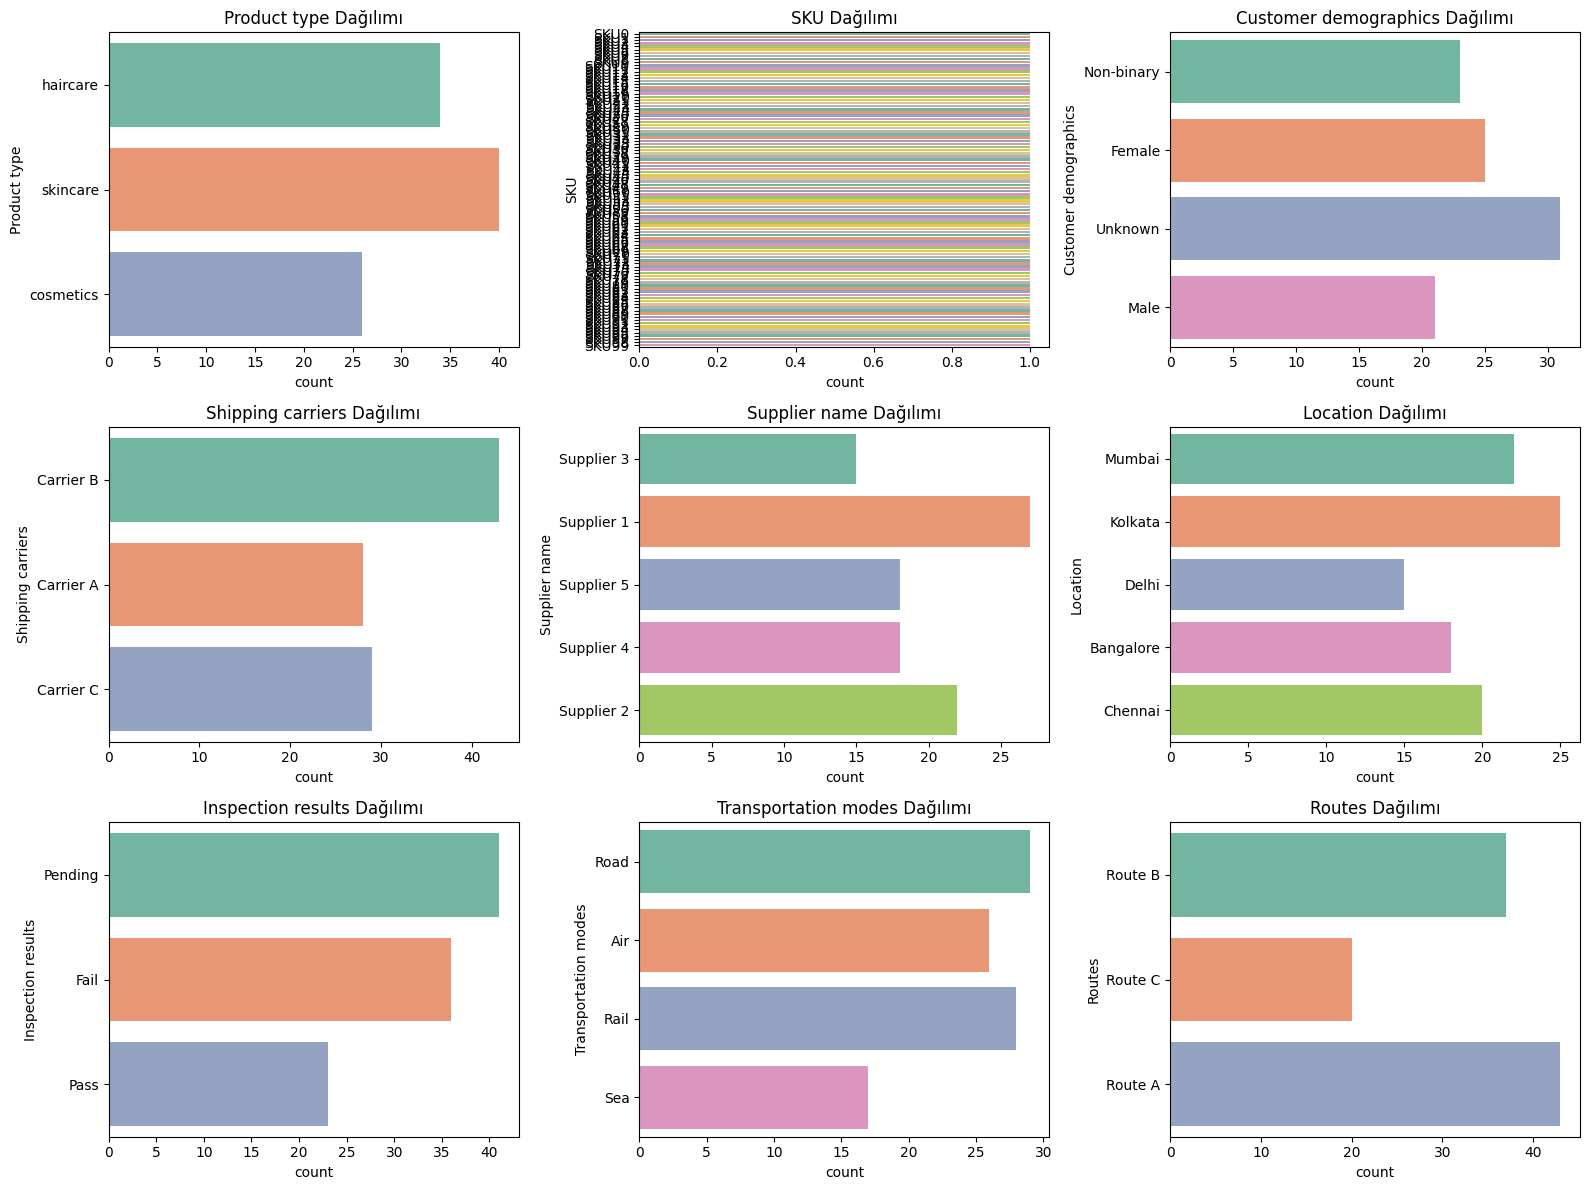

In [23]:
# Kategorik değişkenlerin dağılımını görselleştirelim (Visualizing the distribution of categorical variables)
plt.figure(figsize=(16, 12))  # Grafik boyutunu ayarlıyoruz (Setting the figure size)
for i, col in enumerate(categorical_columns):
    plt.subplot(3, 3, i+1)  # Grafik düzenini 3x3 yapıyoruz (Arranging the plots in a 3x3 grid)
    sns.countplot(y=data[col], palette="Set2")  # Her kategorik değişkenin dağılımını sayısal olarak gösteriyoruz (Displaying the distribution of each categorical variable)
    plt.title(f'{col} Dağılımı')  # Başlık ekliyoruz (Adding title)

plt.tight_layout()  # Grafiklerin düzenini iyileştiriyoruz (Improving the layout of the plots)
plt.show()  # Grafikleri gösteriyoruz (Displaying the plots)

In [31]:
# Kategorik verileri sayısal verilere dönüştürmek için One-Hot Encoding uygulayalım (Applying One-Hot Encoding for categorical variables)
data_encoded = pd.get_dummies(data, drop_first=True)  # İlk sütun hariç, her kategorik değişken için yeni sütunlar oluşturur (Creates new columns for each categorical variable except the first one)

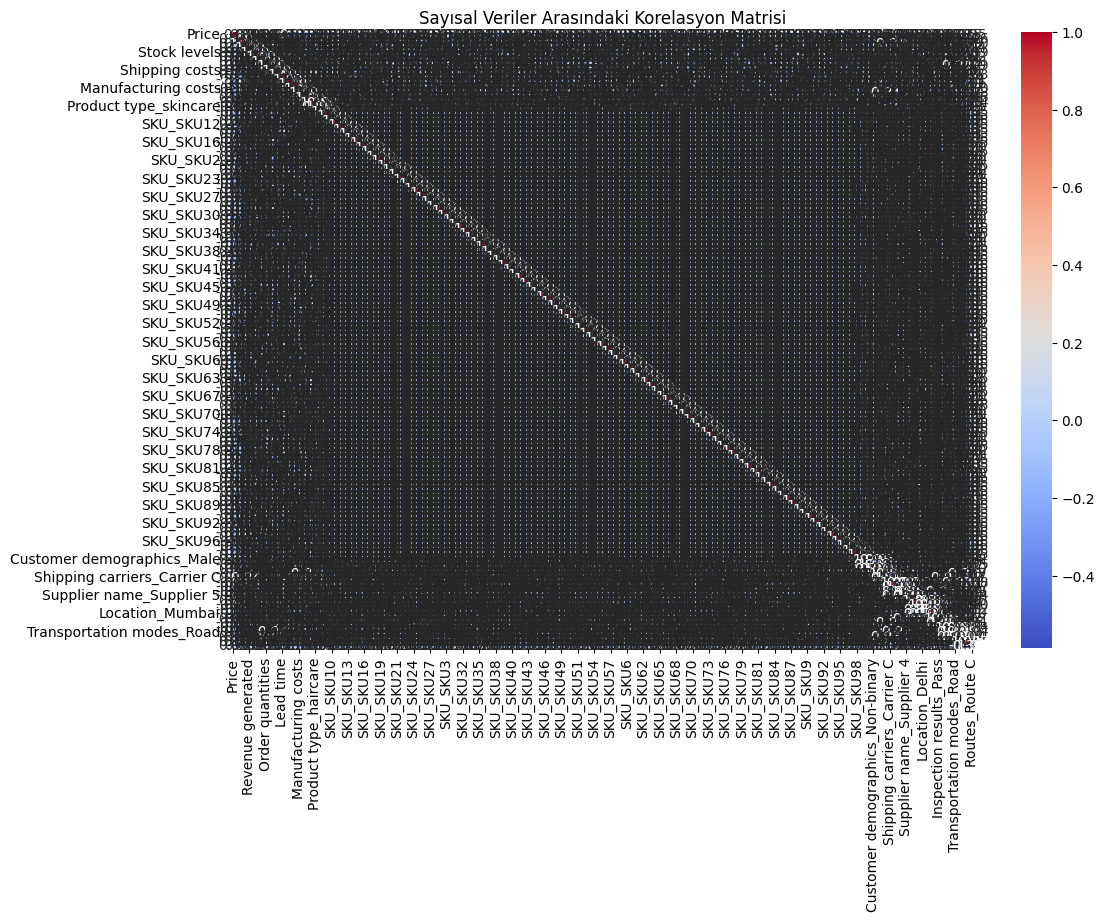

In [33]:
# Sayısal veriler arasındaki ilişkiyi görselleştirelim (Visualizing the correlation between numeric variables)
plt.figure(figsize=(12, 8))  # Grafik boyutunu ayarlıyoruz (Setting the figure size)
corr_matrix = data_encoded.corr()  # Sayısal veriler arasındaki korelasyonu hesaplıyoruz (Calculating the correlation between numeric variables)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')  # Korelasyon matrisini ısı haritası olarak görselleştiriyoruz (Visualizing the correlation matrix as a heatmap)
plt.title('Sayısal Veriler Arasındaki Korelasyon Matrisi')  # Başlık ekliyoruz (Adding title)
plt.show()  # Grafiği gösteriyoruz (Displaying the plot)

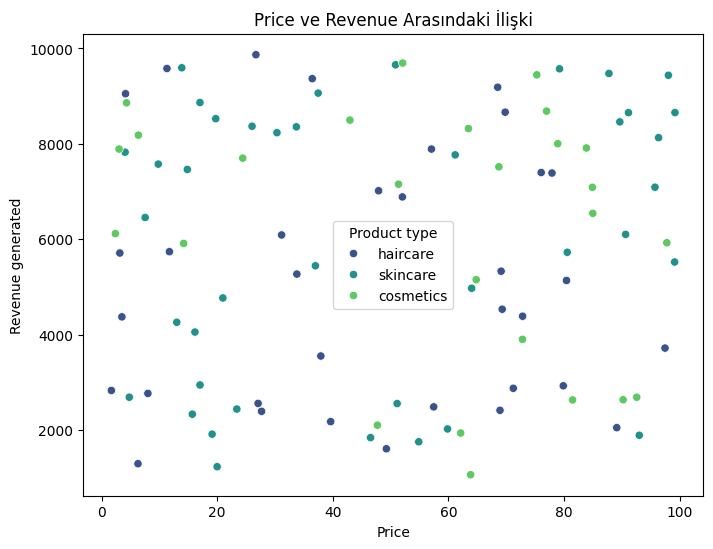

In [34]:
# Price ve Revenue arasındaki ilişkiyi görselleştirelim (Visualizing the relationship between Price and Revenue)
plt.figure(figsize=(8, 6))  # Grafik boyutunu ayarlıyoruz (Setting the figure size)
sns.scatterplot(x=data['Price'], y=data['Revenue generated'], hue=data['Product type'], palette='viridis')  # Scatter plot ile Price ve Revenue arasındaki ilişkiyi gösteriyoruz (Showing the relationship between Price and Revenue using a scatter plot)
plt.title('Price ve Revenue Arasındaki İlişki')  # Başlık ekliyoruz (Adding title)
plt.xlabel('Price')  # X eksenine etiket ekliyoruz (Labeling the x-axis)
plt.ylabel('Revenue generated')  # Y eksenine etiket ekliyoruz (Labeling the y-axis)
plt.show()  # Grafiği gösteriyoruz (Displaying the plot)

In [35]:
# Makine öğrenmesi uygulaması: Lineer Regresyon (Machine Learning: Linear Regression)
# Bağımsız ve bağımlı değişkenleri ayıralım (Separating independent and dependent variables)
features = data_encoded.drop('Revenue generated', axis=1)  # Bağımsız değişkenler (Independent variables)
target = 'Revenue generated'  # Bağımlı değişken (Dependent variable)

In [36]:
# Veriyi eğitim ve test setlerine bölelim (Splitting the data into training and testing sets)
X_train, X_test, y_train, y_test = train_test_split(features, data_encoded[target], test_size=0.2, random_state=42)  # Eğitim ve test setlerine ayırıyoruz (Splitting into train and test sets)

In [37]:
# Lineer Regresyon modelini oluşturalım (Creating the Linear Regression model)
model = LinearRegression()

In [45]:
# Modeli eğitelim (Training the model)
model.fit(X_train, y_train)

LinearRegression()

In [47]:
# Test verisi ile tahmin yapalım (Making predictions on the test data)
y_pred = model.predict(X_test)

In [49]:
# Modelin performansını değerlendirelim (Evaluating the model's performance)
mse = mean_squared_error(y_test, y_pred)  # Ortalama kare hatayı hesaplıyoruz (Calculating Mean Squared Error)
r2 = r2_score(y_test, y_pred)  # R^2 skorunu hesaplıyoruz (Calculating R^2 score)

# Sonuçları yazdıralım (Displaying the results)
print(f'Mean Squared Error (MSE): {mse}')  # Ortalama kare hata (Mean Squared Error)
print(f'R-squared (R^2): {r2}')  # R-kare (R-squared)

Mean Squared Error (MSE): 16184218.253218468
R-squared (R^2): -1.013933275583486


In [63]:
# Özelliklerin önemini yazdıralım (Printing feature importance)
# Küçük katsayıları olan özellikleri eleyelim (Eliminating features with small coefficients)
coefficients = pd.DataFrame(model.coef_, features.columns, columns=['Coefficient'])
coefficients = coefficients[coefficients['Coefficient'].abs() > 0.1]  # Sadece mutlak değeri 0.1'den büyük olanları alıyoruz

# Katsayıları yazdıralım (Printing the coefficients)
print("Model Özelliklerinin Önem Dereceleri (Feature Importance):")
print(coefficients.sort_values(by='Coefficient', ascending=False))

# Görselleştirme yerine sadece katsayıları yazdırıyoruz çünkü görselleştirme çok karmaşık oldu (Instead of visualization, we print the coefficients because the visualization was too complex).


Model Özelliklerinin Önem Dereceleri (Feature Importance):
           Coefficient
SKU_SKU88  4024.112114
SKU_SKU20  3455.481672
SKU_SKU23  3283.387366
SKU_SKU95  2945.557051
SKU_SKU94  2919.425560
...                ...
SKU_SKU17 -3770.956133
SKU_SKU82 -3880.939630
SKU_SKU78 -4059.890246
SKU_SKU37 -4568.398887
SKU_SKU59 -4819.932202

[116 rows x 1 columns]
